In [1]:
import numpy as np
import pandas as pd


In [2]:
df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')
df_gender = pd.read_csv('./dataset/gender_submission.csv')

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_gender.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [6]:
print(df_train.columns)
print("-"*10)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
----------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
df_train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_full = pd.concat([df_train,df_test],axis = 0,ignore_index = True)
print(df_full.shape)


(1309, 12)


/home/hellooo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [12]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [13]:
df_full.describe()


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [14]:
df_full.describe(include="all")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


0    549
1    342
Name: Survived, dtype: int64

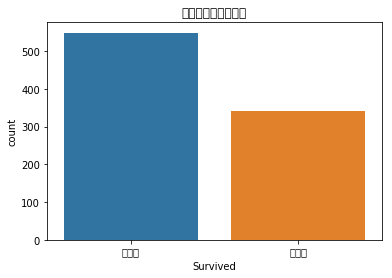

In [15]:
sns.countplot(x="Survived",data=df_train)
plt.title("死亡者数と生存者数")
plt.xticks([0,1],['死亡者','生存者'])

df_train['Survived'].value_counts()

,Survived
Sex,
female,0.742038
male,0.188908


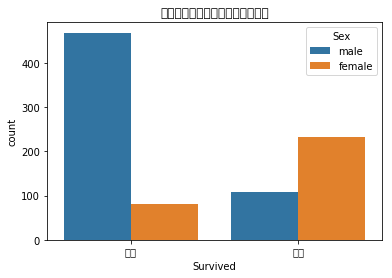

In [16]:
sns.countplot(x="Survived",hue="Sex",data=df_train)
plt.xticks([0.0,1.0],['死亡','生存'])
plt.title("男女別のしぼうしゃ数と生存者数")

df_train[['Sex','Survived']].groupby(['Sex']).mean()

In [17]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


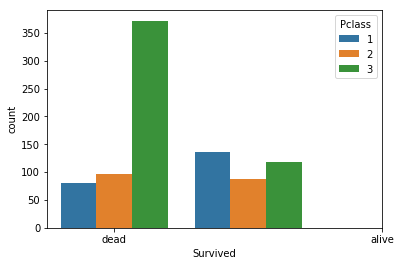

In [18]:
sns.countplot(x="Survived",hue="Pclass",data=df_train)
plt.xticks([0.0,2.0],["dead","alive"])

df_train[["Survived","Pclass"]].groupby(["Pclass"]).mean()

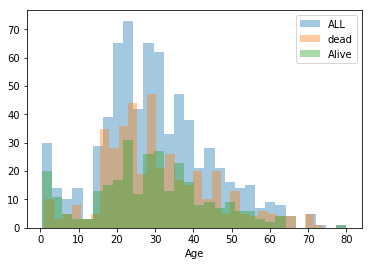

In [19]:
# all hist
sns.distplot(df_train['Age'].dropna(),kde=False,bins =30,label="ALL")

sns.distplot(df_train[df_train['Survived'] == 0].Age.dropna(),kde = False,bins=30,label= "dead")

sns.distplot(df_train[df_train['Survived'] == 1].Age.dropna(),kde = False,bins=30,label= "Alive")

plt.legend()

In [20]:
df_train['CategoricalAge'] = pd.cut(df_train['Age'],8)

df_train[['CategoricalAge','Survived']].groupby(['CategoricalAge'],as_index =False).mean()

,CategoricalAge,Survived
0,"(0.34, 10.368]",0.593750
1,"(10.368, 20.315]",0.382609
2,"(20.315, 30.263]",0.365217
3,"(30.263, 40.21]",0.445161
4,"(40.21, 50.158]",0.383721
5,"(50.158, 60.105]",0.404762
6,"(60.105, 70.052]",0.235294
7,"(70.052, 80.0]",0.200000


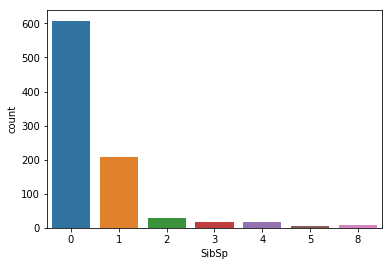

In [21]:
sns.countplot(x="SibSp",data=df_train)

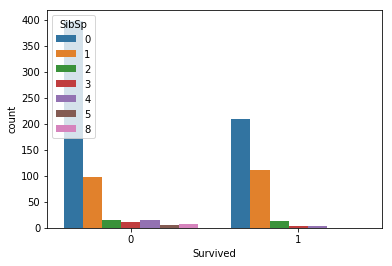

In [22]:
sns.countplot(x="Survived",hue="SibSp",data=df_train)


In [23]:
df_train[['Survived','SibSp']].groupby('SibSp').mean()


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [24]:
df_train['SibSp_0_1_2over'] = [i if i <= 1 else 2 for i in df_train['SibSp']]

,Survived
SibSp_0_1_2over,
0,0.345395
1,0.535885
2,0.270270


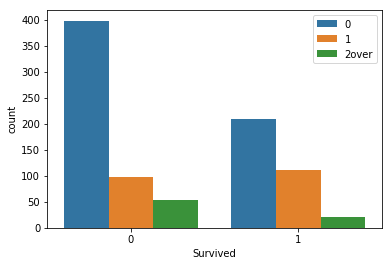

In [25]:
sns.countplot(x = 'Survived',hue="SibSp_0_1_2over",data= df_train)
plt.legend(['0','1','2over'],loc = "upper right")

df_train[["SibSp_0_1_2over",'Survived']].groupby('SibSp_0_1_2over').mean()

In [26]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                714 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           889 non-null object
CategoricalAge     714 non-null category
SibSp_0_1_2over    891 non-null int64
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 91.6+ KB


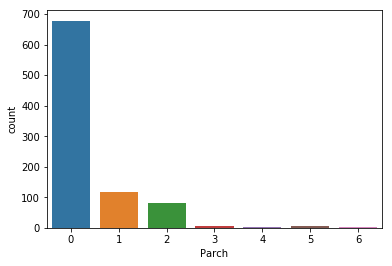

In [27]:
sns.countplot(x='Parch',data=df_train)

In [28]:
df_train['Parch_0_1_2_3over'] = [i if i <=  2 else 3 for i in df_train['Parch']]

,Survived
Parch_0_1_2_3over,
0,0.343658
1,0.550847
2,0.500000
3,0.266667


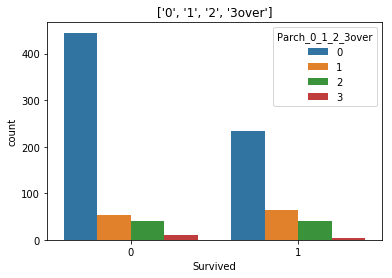

In [29]:
sns.countplot(x= "Survived",hue='Parch_0_1_2_3over',data = df_train)

plt.title(['0','1','2','3over'])
df_train[['Survived','Parch_0_1_2_3over']].groupby('Parch_0_1_2_3over').mean()

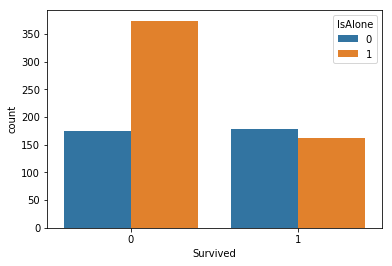

In [32]:
df_train['Family_size'] = df_train['SibSp'] + df_train['Parch'] + 1

df_train['IsAlone'] = 0
df_train.loc[df_train['Family_size'] == 1,'IsAlone'] = 1

sns.countplot(x='Survived',hue="IsAlone",data=df_train)

/home/hellooo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


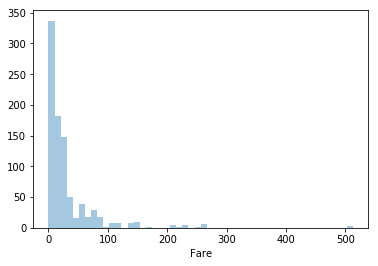

In [35]:
sns.distplot(df_train['Fare']
             .dropna(),kde=False,hist=True)

In [36]:
df_train['CategoricalFare'] = pd.qcut(df_train['Fare'],4)

In [37]:
df_train[['CategoricalFare','Survived']].groupby(['CategoricalFare']).mean()

,Survived
CategoricalFare,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [38]:
df_test['Name'][0:5]

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

In [40]:
set(df_train.Name.str.extract('( [A-Za-z]+)\.',expand=False))

{' Capt',
 ' Col',
 ' Countess',
 ' Don',
 ' Dr',
 ' Jonkheer',
 ' Lady',
 ' Major',
 ' Master',
 ' Miss',
 ' Mlle',
 ' Mme',
 ' Mr',
 ' Mrs',
 ' Ms',
 ' Rev',
 ' Sir'}

In [42]:
import collections
collections.Counter(df_train.Name.str.extract('( [A-Za-z]+)\.',expand=False))

Counter({' Mr': 517,
         ' Mrs': 125,
         ' Miss': 182,
         ' Master': 40,
         ' Don': 1,
         ' Rev': 6,
         ' Dr': 7,
         ' Mme': 1,
         ' Ms': 1,
         ' Major': 2,
         ' Lady': 1,
         ' Sir': 1,
         ' Mlle': 2,
         ' Col': 2,
         ' Capt': 1,
         ' Countess': 1,
         ' Jonkheer': 1})

In [43]:
df_train['Title'] = df_train.Name.str.extract('( [A-Za-z]+)\.',expand=False)
df_test['Title'] = df_test.Name.str.extract('( [A-Za-z]+)\.',expand=False)

In [44]:
df_train.groupby('Title').mean().Age


Title
 Capt        70.000000
 Col         58.000000
 Countess    33.000000
 Don         40.000000
 Dr          42.000000
 Jonkheer    38.000000
 Lady        48.000000
 Major       48.500000
 Master       4.574167
 Miss        21.773973
 Mlle        24.000000
 Mme         24.000000
 Mr          32.368090
 Mrs         35.898148
 Ms          28.000000
 Rev         43.166667
 Sir         49.000000
Name: Age, dtype: float64